## pr-8


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

iris=datasets.load_iris()
print("Iris Data set loaded...")

x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
print("Dataset is split into training and testing...")
print("Size of trainng data and its label",x_train.shape,y_train.shape)
print("Size of trainng data and its label",x_test.shape, y_test.shape)

for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))


classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

print("Results of Classification using K-nn with K=1 ")
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r]), " Predicted-label:",str(y_pred[r]))


print("Classification Accuracy :" , classifier.score(x_test,y_test));


from sklearn.metrics import classification_report, confusion_matrix 
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Metrics')
print(classification_report(y_test,y_pred))


Iris Data set loaded...
Dataset is split into training and testing...
Size of trainng data and its label (135, 4) (135,)
Size of trainng data and its label (15, 4) (15,)
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1 
 Sample: [6.7 3.1 4.7 1.5]  Actual-label: 1  Predicted-label: 1
 Sample: [6.3 2.5 4.9 1.5]  Actual-label: 1  Predicted-label: 2
 Sample: [5.6 2.9 3.6 1.3]  Actual-label: 1  Predicted-label: 1
 Sample: [6.  3.  4.8 1.8]  Actual-label: 2  Predicted-label: 2
 Sample: [6.4 2.9 4.3 1.3]  Actual-label: 1  Predicted-label: 1
 Sample: [5.8 2.7 3.9 1.2]  Actual-label: 1  Predicted-label: 1
 Sample: [6.3 2.3 4.4 1.3]  Actual-label: 1  Predicted-label: 1
 Sample: [6.3 2.8 5.1 1.5]  Actual-label: 2  Predicted-label: 1
 Sample: [5.5 2.4 3.8 1.1]  Actual-label: 1  Predicted-label: 1
 Sample: [6.3 3.3 6.  2.5]  Actual-label: 2  Predicted-label: 2
 Sample: [5.1 3.3 1.7 0.5]  Actual-label: 0  Predicted-label: 0
 Sample: [7.2 3.6 6.1

# pr-3

In [2]:
import csv
def get_domains(examples):
    d = [set() for i in examples[0]]
    for x in examples:
        for i, xi in enumerate(x):
            d[i].add(xi)
    return [list(sorted(x)) for x in d]

def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == "?" or (x != "0" and (x == y or y == "0"))
        more_general_parts.append(mg)
    return all(more_general_parts)

def fulfills(example, hypothesis):
# the implementation is the same as for hypotheses:
    return more_general(hypothesis, example)

def min_generalizations(h, x):
    h_new = list(h)
    for i in range(len(h)):
        if not fulfills(x[i:i+1], h[i:i+1]):
            h_new[i] = '?' if h[i] != '0' else x[i]
    return [tuple(h_new)]

def min_specializations(h, domains, x):
    results = []
    for i in range(len(h)):
        if h[i] == "?":
            for val in domains[i]:
                if x[i] != val:
                    h_new = h[:i] + (val,) + h[i+1:]
                    results.append(h_new)
        elif h[i] != "0":
            h_new = h[:i] + ('0',) + h[i+1:]
            results.append(h_new)
    return results
                
def generalize_S(x, G, S):
    S_prev = list(S)
    for s in S_prev:
        if s not in S:
            continue
        if not fulfills(x, s):
            S.remove(s)
            Splus = min_generalizations(s, x)
            ## keep only generalizations that have a counterpart in G
            S.update([h for h in Splus if any([more_general(g,h) for g in G])])
            ## remove hypotheses less specific than any other in S
            S.difference_update([h for h in S if any([more_general(h, h1) for h1 in S if h != h1])])
    return S

def specialize_G(x, domains, G, S):
    G_prev = list(G)
    for g in G_prev:
        if g not in G:
            continue
        if fulfills(x, g):
            G.remove(g)
            Gminus = min_specializations(g, domains, x)
            ## keep only specializations that have a conuterpart in S
            G.update([h for h in Gminus if any([more_general(h, s) for s in S])])
            ## remove hypotheses less general than any other in G
            G.difference_update([h for h in G if any([more_general(g1, h) for g1 in G if h != g1])])
            
    return G

def candidate_elimination(examples):
    domains = get_domains(examples)[:-1]
    n = len(domains)
    G = set([("?",)*n])
    S = set([("0",)*n])
    print("Maximally specific hypotheses - S ")
    print("Maximally general hypotheses - G ")
    i=0
    print("\nS[0]:",str(S),"\nG[0]:",str(G))
    for xcx in examples:
        i=i+1
        x, cx = xcx[:-1], xcx[-1]
        if cx=='Y': # x is positive example
            G = {g for g in G if fulfills(x, g)}
            S = generalize_S(x, G, S)
        else:
            S = {s for s in S if not fulfills(x, s)}
            G = specialize_G(x, domains, G, S)
        print("\nS[{0}]:".format(i),S)
        print("G[{0}]:".format(i),G)
    return

with open('3.csv') as csvFile:
    examples = [tuple(line) for line in csv.reader(csvFile)]

candidate_elimination(examples)


Maximally specific hypotheses - S 
Maximally general hypotheses - G 

S[0]: {('0', '0', '0', '0', '0', '0')} 
G[0]: {('?', '?', '?', '?', '?', '?')}

S[1]: {('0', '0', '0', '0', '0', '0')}
G[1]: {('?', '?', '?', '?', '?', 'change'), ('?', '?', '?', 'strong', '?', '?'), ('?', '?', '?', '?', '?', 'same'), ('?', '?', '?', '?', 'warm', '?'), ('?', '?', 'normal', '?', '?', '?'), ('?', 'cold', '?', '?', '?', '?'), ('sunny', '?', '?', '?', '?', '?'), ('rainy', '?', '?', '?', '?', '?'), ('?', '?', '?', '?', 'cool', '?'), ('?', '?', 'high', '?', '?', '?'), ('?', 'warm', '?', '?', '?', '?')}

S[2]: {('sunny', 'warm', 'normal', 'strong', 'warm', 'same')}
G[2]: {('?', '?', '?', 'strong', '?', '?'), ('?', '?', '?', '?', '?', 'same'), ('?', '?', '?', '?', 'warm', '?'), ('?', 'warm', '?', '?', '?', '?'), ('sunny', '?', '?', '?', '?', '?'), ('?', '?', 'normal', '?', '?', '?')}

S[3]: {('sunny', 'warm', '?', 'strong', 'warm', 'same')}
G[3]: {('?', '?', '?', 'strong', '?', '?'), ('?', '?', '?', '?', '?'

## pr -4

In [3]:
import math
import csv

def load_csv(filename):
    lines = csv.reader(open(filename, "r"));
    dataset = list(lines)
    headers = dataset.pop(0)
    return dataset, headers

class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""
        
def subtables(data, col, delete):
    dic = {}
    coldata = [ row[col] for row in data]
    attr = list(set(coldata)) # All values of attribute retrived
    for k in attr:
        dic[k] = []
    for y in range(len(data)):
        key = data[y][col]
        if delete:
            del data[y][col]
        dic[key].append(data[y])
    return attr, dic

def entropy(S):
    attr = list(set(S))
    if len(attr) == 1: #if all are +v
        return 0
    counts = [0,0] # Only two values possible 'yes' or 'no'
    for i in range(2):
        counts[i] = sum( [1 for x in S if attr[i] == x] ) / (len(S) * 1.0)
    sums = 0
    for cnt in counts:
        sums += -1 * cnt * math.log(cnt, 2)
    return sums

def compute_gain(data, col):
    attValues, dic = subtables(data, col, delete=False)
    total_entropy = entropy([row[-1] for row in data])
    for x in range(len(attValues)):
        ratio = len(dic[attValues[x]]) / ( len(data) * 1.0)
        entro = entropy([row[-1] for row in dic[attValues[x]]])
        total_entropy -= ratio*entro
    return total_entropy

def build_tree(data, features):
    lastcol = [row[-1] for row in data]
    if (len(set(lastcol))) == 1: # If all samples have same labels return that label
        node=Node("")
        node.answer = lastcol[0]
        return node
    n = len(data[0])-1
    gains = [compute_gain(data, col) for col in range(n) ]
    split = gains.index(max(gains)) # Find max gains and returns index
    node = Node(features[split]) # 'node' stores attribute selected
    #del (features[split])
    fea = features[:split]+features[split+1:]
    attr, dic = subtables(data, split, delete=True) # Data will be spilt in subtables
    for x in range(len(attr)):
        child = build_tree(dic[attr[x]], fea)
        node.children.append((attr[x], child))
    return node

def print_tree(node, level):
    if node.answer != "":
        print(" "*level, node.answer) # Displays leaf node yes/no
        return
    print(" "*level, node.attribute) # Displays attribute Name
    for value, n in node.children:
        print(" "*(level+1), value)
        print_tree(n, level + 2)
    
def classify(node,x_test,features):
    if node.answer != "":
        print(node.answer)
        return
    pos = features.index(node.attribute)
    for value, n in node.children:
        if x_test[pos]==value:
            classify(n,x_test,features)
            
            
''' Main program '''
dataset, features = load_csv("4train.csv") # Read Tennis data
node = build_tree(dataset, features) # Build decision tree
print("The decision tree for the dataset using ID3 algorithm is ")
print_tree(node, 0)
testdata, features = load_csv("4test.csv")
for xtest in testdata:
    print("The test instance : ",xtest)
    print("The predicted label : ", end="")
    classify(node,xtest,features)


The decision tree for the dataset using ID3 algorithm is 
 Outlook
  overcast
   yes
  rain
   Wind
    strong
     no
    weak
     yes
  sunny
   Humidity
    normal
     yes
    high
     no
The test instance :  ['rain', 'cool', 'normal', 'strong']
The predicted label : no
The test instance :  ['sunny', 'mild', 'normal', 'strong']
The predicted label : yes


## pr- 1


In [4]:
def aStarAlgo(start_node, stop_node):

        open_set = set(start_node) 
        closed_set = set()
        g = {} 
        parents = {} 

        g[start_node] = 0

        parents[start_node] = start_node

        while len(open_set) > 0:
            n = None

            for v in open_set:
                if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                    n = v

            if n == stop_node or Graph_nodes[n] == None:
                pass
            else:
                for (m, weight) in get_neighbors(n):

                    if m not in open_set and m not in closed_set:
                        open_set.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight

                    else:
                        if g[m] > g[n] + weight:

                            g[m] = g[n] + weight

                            parents[m] = n

                            if m in closed_set:
                                closed_set.remove(m)
                                open_set.add(m)

            if n == None:
                print('Path does not exist!')
                return None

            if n == stop_node:
                path = []

                while parents[n] != n:
                    path.append(n)
                    n = parents[n]

                path.append(start_node)

                path.reverse()

                print('Path found: {}'.format(path))
                return path

            open_set.remove(n)
            closed_set.add(n)

        print('Path does not exist!')
        return None

def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None

def heuristic(n):
        H_dist = {
            'A': 10,
            'B': 8,
            'C': 5,
            'D': 7,
            'E': 3,
            'F': 6,
            'G': 5,
            'H': 3,
            'I': 1,
            'J': 0             
        }

        return H_dist[n]

Graph_nodes = {
    'A': [('B', 6), ('F', 3)],
    'B': [('C', 3), ('D', 2)],
    'C': [('D', 1), ('E', 5)],
    'D': [('C', 1), ('E', 8)],
    'E': [('I', 5), ('J', 5)],
    'F': [('G', 1),('H', 7)] ,
    'G': [('I', 3)],
    'H': [('I', 2)],
    'I': [('E', 5), ('J', 3)],

}
aStarAlgo('A', 'J')

Path found: ['A', 'F', 'G', 'I', 'J']


['A', 'F', 'G', 'I', 'J']

## pr - 2

In [5]:
class Graph:
    def __init__(self, graph, heuristicNodeList, startNode):  

        self.graph = graph
        self.H=heuristicNodeList
        self.start=startNode
        self.parent={}
        self.status={}
        self.solutionGraph={}

    def applyAOStar(self):         
        self.aoStar(self.start, False)

    def getNeighbors(self, v):     
        return self.graph.get(v,'')

    def getStatus(self,v):         
        return self.status.get(v,0)

    def setStatus(self,v, val):    
        self.status[v]=val

    def getHeuristicNodeValue(self, n):
        return self.H.get(n,0)     

    def setHeuristicNodeValue(self, n, value):
        self.H[n]=value            

    def printSolution(self):
        print("FOR GRAPH SOLUTION, TRAVERSE THE GRAPH FROM THE START NODE:",self.start)
        print("------------------------------------------------------------")
        print(self.solutionGraph)
        print("------------------------------------------------------------")

    def computeMinimumCostChildNodes(self, v):  
        minimumCost=0
        costToChildNodeListDict={}
        costToChildNodeListDict[minimumCost]=[]
        flag=True
        for nodeInfoTupleList in self.getNeighbors(v):  
            cost=0
            nodeList=[]
            for c, weight in nodeInfoTupleList:
                cost=cost+self.getHeuristicNodeValue(c)+weight
                nodeList.append(c)

            if flag==True:                      
                minimumCost=cost
                costToChildNodeListDict[minimumCost]=nodeList      
                flag=False
            else:                               
                if minimumCost>cost:
                    minimumCost=cost
                    costToChildNodeListDict[minimumCost]=nodeList  

        return minimumCost, costToChildNodeListDict[minimumCost]   

    def aoStar(self, v, backTracking):     

        print("HEURISTIC VALUES  :", self.H)
        print("SOLUTION GRAPH    :", self.solutionGraph)
        print("PROCESSING NODE   :", v)
        print("-----------------------------------------------------------------------------------------")

        if self.getStatus(v) >= 0:        
            minimumCost, childNodeList = self.computeMinimumCostChildNodes(v)
            self.setHeuristicNodeValue(v, minimumCost)
            self.setStatus(v,len(childNodeList))

            solved=True                   
            for childNode in childNodeList:
                self.parent[childNode]=v
                if self.getStatus(childNode)!=-1:
                    solved=solved & False

            if solved==True:             
                self.setStatus(v,-1)    
                self.solutionGraph[v]=childNodeList 

            if v!=self.start:           
                self.aoStar(self.parent[v], True)   

            if backTracking==False:     
                for childNode in childNodeList:   
                    self.setStatus(childNode,0)   
                    self.aoStar(childNode, False) 

h1 = {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
graph1 = {
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],
    'B': [[('G', 1)], [('H', 1)]],
    'C': [[('J', 1)]],
    'D': [[('E', 1), ('F', 1)]],
    'G': [[('I', 1)]]   
}
G1= Graph(graph1, h1, 'A')
G1.applyAOStar() 
G1.printSolution()

h2 = {'A': 1, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}  
graph2 = {                                        
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],      
    'B': [[('G', 1)], [('H', 1)]],                
    'D': [[('E', 1), ('F', 1)]]                   
}

G2 = Graph(graph2, h2, 'A')                       
G2.applyAOStar()                                  
G2.printSolution()

HEURISTIC VALUES  : {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : A
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : B
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : A
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : G
-----------------------------------------------------------------------------------------
HEURISTIC VALUES 

# pr -5

In [6]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0)
y = y/100


def sigmoid (x):
    return 1/(1 + np.exp(-x))


def dersig(x):
    return x * (1 - x)


e=7000
lr=0.1 
iln = 2 
hln = 3
oln = 1 

wh=np.random.uniform(size=(iln,hln))
bh=np.random.uniform(size=(1,hln))
wout=np.random.uniform(size=(hln,oln))
bout=np.random.uniform(size=(1,oln))

for i in range(e):
    h1=np.dot(X,wh)
    h=h1 + bh
    hla = sigmoid(h)
    oi1=np.dot(hla,wout)
    oi= oi1+ bout
    op = sigmoid(oi)
    
    EO = y-op
    og = dersig(op)
    dop = EO* og
    EH = dop.dot(wout.T)
    hg = dersig(hla)
    dhl = EH * hg
    wout += hla.T.dot(dop) *lr
    wh += X.T.dot(dhl) *lr
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,op)


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89475296]
 [0.87877365]
 [0.89586631]]


# pr-7


Actual Target is:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


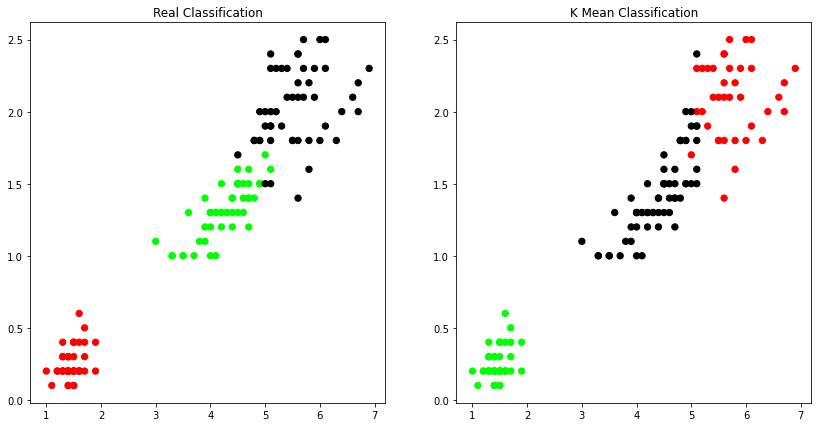


What KMeans thought: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Accuracy of KMeans is  0.8933333333333333
Confusion Matrix for KMeans is 
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]

      Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
33      -0.416010     2.630382     -1.340227    -1.315444
103      0.553333    -0.362176      1.046945     0.790671
46      -0.900681     1.709595     -1.226552    -1.315444
27      -0.779513     1.019004     -1.283389    -1.315444
50       1.401508     0.328414      0.535409     0.264142


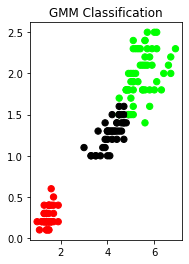


What EM thought: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Accuracy of EM is  0.9666666666666667
Confusion Matrix for EM is 
 [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib
l1 = [0,1,2]

def rename(s):
    l2 = []
    for i in s:
        if i not in l2:
            l2.append(i)

    for i in range(len(s)):
        pos = l2.index(s[i])
        s[i] = l1[pos]

    return s

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

print("Actual Target is:\n", iris.target)


model = KMeans(n_clusters=3)
model.fit(X)

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.show()

km = rename(model.labels_)
print("\nWhat KMeans thought: \n", km)
print("Accuracy of KMeans is ",sm.accuracy_score(y, km))
print("Confusion Matrix for KMeans is \n",sm.confusion_matrix(y, km))

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
print("\n",xs.sample(5))

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_cluster_gmm = gmm.predict(xs)

plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')
plt.show()

em = rename(y_cluster_gmm)
print("\nWhat EM thought: \n", em)
print("Accuracy of EM is ",sm.accuracy_score(y, em))
print("Confusion Matrix for EM is \n", sm.confusion_matrix(y, em))


# pr-6

In [8]:

import csv
import random
import math
def loadCsv(filename):
    lines = csv.reader(open(filename, "r"));
    dataset = list(lines)
    for i in range(len(dataset)):
#converting strings into numbers for processing
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset
def splitDataset(dataset, splitRatio):
#67% training size
    trainSize = int(len(dataset) * splitRatio);
    trainSet = []
    copy = list(dataset);
    while len(trainSet) < trainSize:
#generate indices for the dataset list randomly to pick ele for training data
        index = random.randrange(len(copy));
        trainSet.append(copy.pop(index))
    return [trainSet, copy]
def separateByClass(dataset):
    separated = {}
#creates a dictionary of classes 1 and 0 where the values are the instacnes belonging to each class
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated
def mean(numbers):
    return sum(numbers)/float(len(numbers))
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)];
    del summaries[-1]
    return summaries
def summarizeByClass(dataset):
    separated = separateByClass(dataset);
    summaries = {}
    for classValue, instances in separated.items():
#summaries is a dic of tuples(mean,std) for each class value
        summaries[classValue] = summarize(instances)
    return summaries
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():#class and attribute information as mean and sd
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i] #take mean and sd of every attribute for class 0 and 1 seperaely
            x = inputVector[i] #testvector's first attribute
            probabilities[classValue] *= calculateProbability(x, mean, stdev);#use normal dist
    return probabilities
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():#assigns that class which has he highest prob
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0
def main():
    filename = '6.csv'
    splitRatio = 0.67
    dataset = loadCsv(filename);
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split {0} rows into train={1} and test={2} rows'.format(len(dataset),len(trainingSet), len(testSet)))
# prepare model
    summaries = summarizeByClass(trainingSet);
# test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy of the classifier is : {0}%'.format(accuracy))
main()


Split 768 rows into train=514 and test=254 rows
Accuracy of the classifier is : 68.50393700787401%


# pr -9

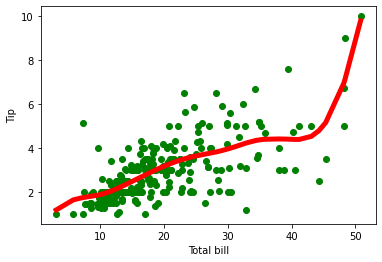

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m))) 
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

def graphPlot(X,ypred):
    sortindex = X[:,1].argsort(0) #argsort - index of the smallest
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill,tip, color='green')
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show();
# load data points
data = pd.read_csv('9.csv')
bill = np.array(data.total_bill) # We use only Bill amount and Tips data
tip = np.array(data.tip)
mbill = np.mat(bill) # .mat will convert nd array is converted in 2D array
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T)) # 244 rows, 2 cols
# increase k to get smooth curves
ypred = localWeightRegression(X,mtip,3)
graphPlot(X,ypred)
